# Exploratory Data Analysis 

# Analysis 

## Imports 

In [108]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading

In [109]:
# defining data source url 
url = 'https://s3.amazonaws.com/talent-assets.datacamp.com/product_sales.csv'

In [110]:
# reading data from url as pandas dataframe 
df = pd.read_csv(url)
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


## Data validation and cleaning 

### Initial inspection 

In [111]:
# checking data types and number of null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [112]:
# checking min, max, mean, std for numerical columns
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


Findings: 
- Pens and Printers was founded in 1984 (41 years to date), hence max value in years_as_customer column (63 years) exceeds total number of years the company has been operating. 
- low standard deviation in column nb_sold, indicating moderate variability in amount of products sold. 
- high standard deviation in column revenue, indicating high variability in revenue. 
- very high standard deviation in column years_as_customer, indicating very high variability in year as customer. 
- low standard deviation in column nb_site_visits, indicating low variability in number of times the customer has visited the website during the last 6 months. 


#### Week column 

In [113]:
# checking unique values in 'week' column and counting the number of each value
# the values should be 1-6 since there are 6 weeks of data
df['week'].value_counts()

week
1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: count, dtype: int64

#### Sales method column 

In [114]:
df.keys()

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

In [115]:
# checking the unique values in 'sales_method' column and counting the number of each value
# there should be 3 unique values since there are 3 sales methods
df['sales_method'].value_counts()

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

In [116]:
# correcting misspelled values
# assuming "em + call" is the same as "email + call" and lowercase 'email' is the same as uppercase 'Email' 
df['sales_method'] = df['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})
df['sales_method'].value_counts()

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64

#### Customer id column 

In [117]:
df.keys()

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

In [118]:
# checking if values in 'customer_id' contain duplicates
duplicates = df['customer_id'].duplicated()
duplicates.value_counts()

customer_id
False    15000
Name: count, dtype: int64

#### Number of new products sold

In [119]:
df.keys()

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

In [120]:
# counting number of unique values in 'customer_id' column
df['nb_sold'].value_counts()

nb_sold
10    3677
9     3535
11    2439
8     1941
12    1088
13     939
7      698
15     555
14      97
16      31
Name: count, dtype: int64

In [121]:
# renamning columns for better readability
df.rename(columns={'nb_sold': 'nb_new_products_sold'}, inplace=True)

#### Revenue column 

In [122]:
# counting number of null entries in 'revenue' column
df['revenue'].isnull().sum()

1074

In [123]:
# inspecting rows with null values in 'revenue' column
null_rows = df[df['revenue'].isnull()]
null_rows.sample(20)

,week,sales_method,customer_id,nb_new_products_sold,revenue,years_as_customer,nb_site_visits,state
4283,6,Call,fd5bfb73-d1b6-477d-9854-dbcdf4e2e7a2,13,NaN,0,28,Wisconsin
9260,5,Email + Call,dc2d4eeb-6d26-49ca-b687-ede94de0be79,13,NaN,2,29,New York
4972,4,Email,fe7f921f-664e-4770-bdf6-94d47b143987,11,NaN,3,29,Maine
11543,6,Email + Call,7b78aee4-9a5d-47f5-a508-1c1d1db45362,15,NaN,4,28,Virginia
12277,6,Email + Call,33f2817e-88c4-4900-a194-2760b2a7dfe1,15,NaN,1,29,Vermont
9487,4,Call,0b765d1f-c56d-4c00-89ef-2d6639ba2256,10,NaN,0,26,Illinois
3834,4,Email + Call,a6c6a5fc-8be7-42b3-8153-ab8b79260429,12,NaN,26,27,California
11814,2,Email,d020b565-7e72-4b29-bca0-d54ed23b40aa,10,NaN,3,30,Virginia
6624,5,Email + Call,ac270603-77de-49ac-a2e1-51cd11d06249,13,NaN,0,25,Florida
818,3,Call,51beaeb3-fdac-41cc-86a8-445f5107e068,8,NaN,3,26,California


In [124]:
# assuming that all sales need to have a revenue value, or 0 if no revenue. 
# adding index of rows with null values to a list for removal
remove_lst = df.loc[df['revenue'].isnull()].index

In [125]:
# making sure the list is correct
len(remove_lst)

1074

In [126]:
# dropping rows with null entries in 'revenue' column
df.drop(remove_lst, inplace = True)
df.reset_index(drop = True, inplace = True)

#### Years as customer column 

In [127]:
df.keys()

Index(['week', 'sales_method', 'customer_id', 'nb_new_products_sold',
       'revenue', 'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

In [128]:
# getting rows with 'years_as_customer' greater than 41, hence exceeding the total number of years the company has been operating
df[df['years_as_customer'] > 41]

,week,sales_method,customer_id,nb_new_products_sold,revenue,years_as_customer,nb_site_visits,state
12751,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
12806,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [129]:
# adding index of rows with 'years_as_customer' greater than 41 to a list for removal
remove_lst = df.loc[df['years_as_customer'] > 41].index

In [130]:
# deleting rows with 'years_as_customer' greater than 41
df.drop(remove_lst, inplace = True)
df.reset_index(drop = True, inplace = True)

#### Number of site visits column 

In [131]:
df.keys()

Index(['week', 'sales_method', 'customer_id', 'nb_new_products_sold',
       'revenue', 'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

In [132]:
df['nb_site_visits'].value_counts()

nb_site_visits
25    1557
26    1524
24    1476
23    1380
27    1344
22    1135
28    1074
21     862
29     821
30     609
20     567
19     400
31     329
32     234
18     208
17     101
33      99
16      79
34      40
15      29
35      27
36      13
14       7
37       4
13       4
12       1
Name: count, dtype: int64

#### State column 

In [133]:
df['state'].value_counts()

state
California        1737
Texas             1109
New York           899
Florida            826
Illinois           576
Pennsylvania       553
Ohio               520
Michigan           466
Georgia            460
North Carolina     430
New Jersey         402
Virginia           346
Indiana            327
Washington         309
Tennessee          308
Arizona            295
Missouri           286
Massachusetts      270
Maryland           245
Wisconsin          235
Minnesota          228
Oregon             214
Louisiana          213
South Carolina     213
Colorado           212
Alabama            202
Kentucky           202
Oklahoma           184
Connecticut        167
Iowa               154
Mississippi        133
Kansas             129
Arkansas           118
Utah               115
Nevada              97
Nebraska            86
New Mexico          79
West Virginia       77
Hawaii              67
Maine               60
Idaho               59
New Hampshire       48
Montana             43
Rhode

#### Duplicates

In [134]:
# checking number of duplicated rows 
df.duplicated().value_counts()

False    13924
Name: count, dtype: int64

## Exploratory Data Analysis

### How many customers were there for each approach?

In [135]:
# inspecting dataframe
df.head()

,week,sales_method,customer_id,nb_new_products_sold,revenue,years_as_customer,nb_site_visits,state
0,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
1,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
2,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
3,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
4,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia


In [136]:
# grouping by approach and counting number of customers per approach
customer_per_approach = df.groupby('sales_method')['customer_id'].count()

# looping over dataframe and printing result 
for approach, nb_customers in customer_per_approach.items():
    print(f'{approach} approach has {nb_customers} customers.')

Call approach has 4780 customers.
Email approach has 6921 customers.
Email + Call approach has 2223 customers.


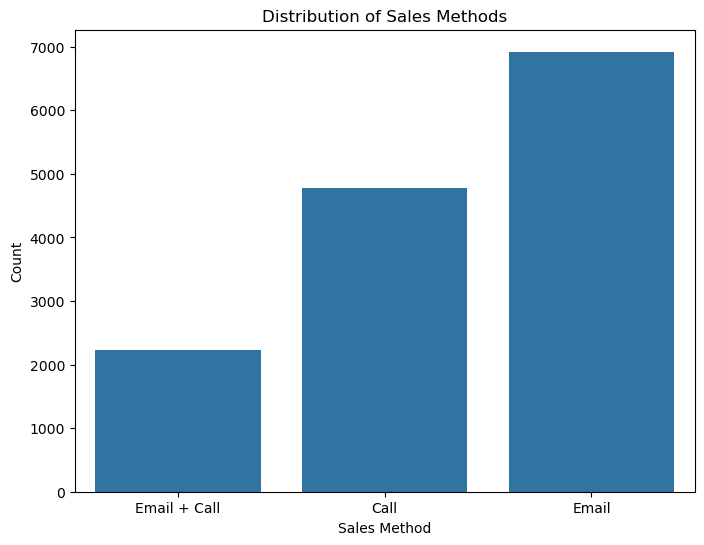

In [137]:
# visualizing the distribution of sales methods
plt.figure(figsize=(8, 6))
sns.countplot(x='sales_method', data=df)
plt.title('Distribution of Sales Methods')
plt.xlabel('Sales Method')
plt.ylabel('Count')
plt.show()

### What does the spread of the revenue look like overall?

In [138]:
# inspecting the mean and standard deviation of 'revenue' column
df['revenue'].describe()

count    13924.000000
mean        93.937828
std         47.437281
min         32.540000
25%         52.470000
50%         89.500000
75%        107.330000
max        238.320000
Name: revenue, dtype: float64

In [139]:
# getting the total revenue
print(f'Total revenue: {df["revenue"].sum()}')

Total revenue: 1307990.32


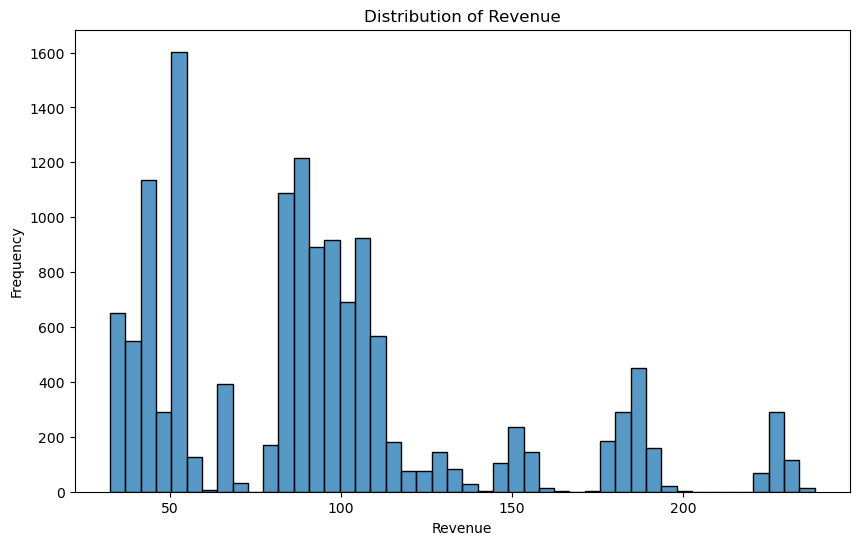

In [140]:
# visualizing the distribution of revenue
plt.figure(figsize=(10, 6))
sns.histplot(df['revenue'], kde=False)  # kde=false to remove the density curve
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

### What does the spread of the revenue look like for each method?

In [141]:
df.groupby('sales_method')['revenue'].sum()

sales_method
Call            227513.02
Email           672220.61
Email + Call    408256.69
Name: revenue, dtype: float64

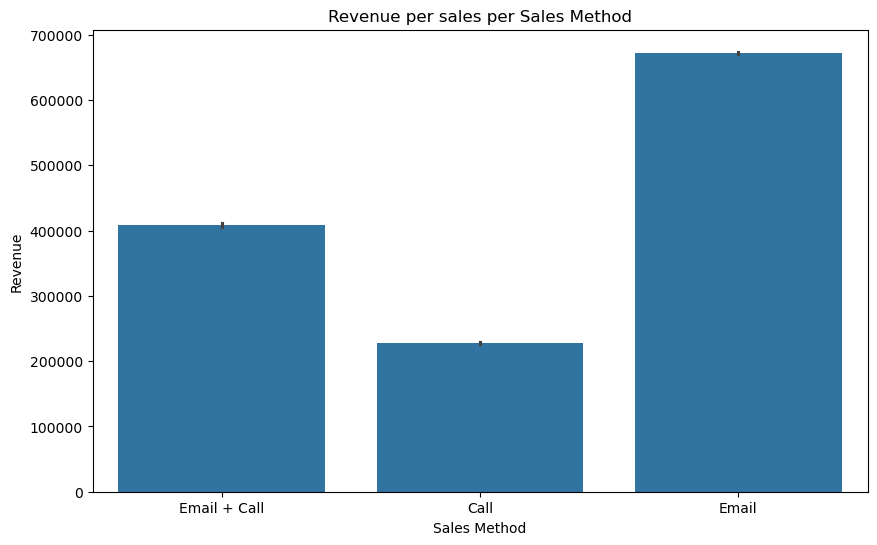

In [142]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_method', y='revenue', data=df, estimator=np.sum)
plt.title('Revenue per sales per Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

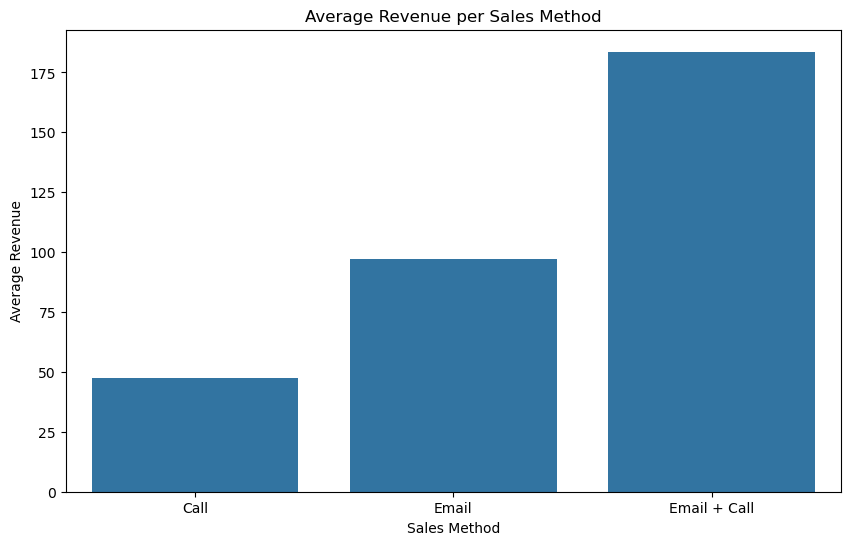

In [143]:
# group by sales method and calculate the mean number of revenue per sales method
average_revenue = df.groupby('sales_method')['revenue'].mean().reset_index()

# visualizing the average revenue per sales method
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_method',
            y='revenue',
            data=average_revenue,
)
plt.title('Average Revenue per Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Average Revenue')
plt.show()

### Was there any difference in revenue over time for each of the methods?

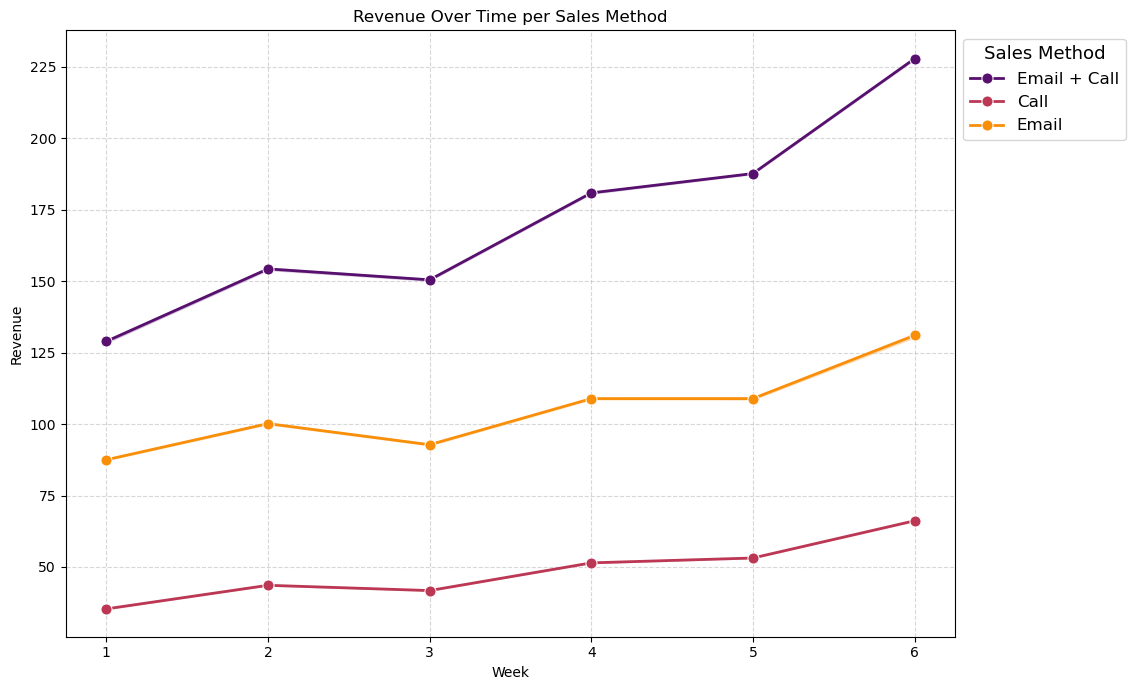

In [144]:
plt.figure(figsize=(12, 7))
sns.lineplot(
    x='week',
    y='revenue',
    data=df,
    hue='sales_method',
    linewidth=2, 
    marker='o',  
    markersize=8,  
    err_style="band",  
    palette="inferno",  
)

plt.title('Revenue Over Time per Sales Method') 
plt.xlabel('Week') 
plt.ylabel('Revenue') 

plt.grid(True, linestyle='--', alpha=0.5)  
plt.legend(
    title='Sales Method',
    fontsize=12,
    title_fontsize=13,
    loc='upper left',
    bbox_to_anchor=(1, 1),
)  
plt.tight_layout()
plt.subplots_adjust(right=0.8)  

plt.show()

In [145]:
# Group by week and sales_method, sum the revenue
grouped_df = df.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

# Pivot the data to get sales methods as columns
final_df = grouped_df.pivot(index='week', columns='sales_method', values='revenue').reset_index()

# Fill any NaN values with 0
final_df = final_df.fillna(0)

# Save to CSV
final_df.to_csv('revenue_by_week_and_method.csv', index=False)

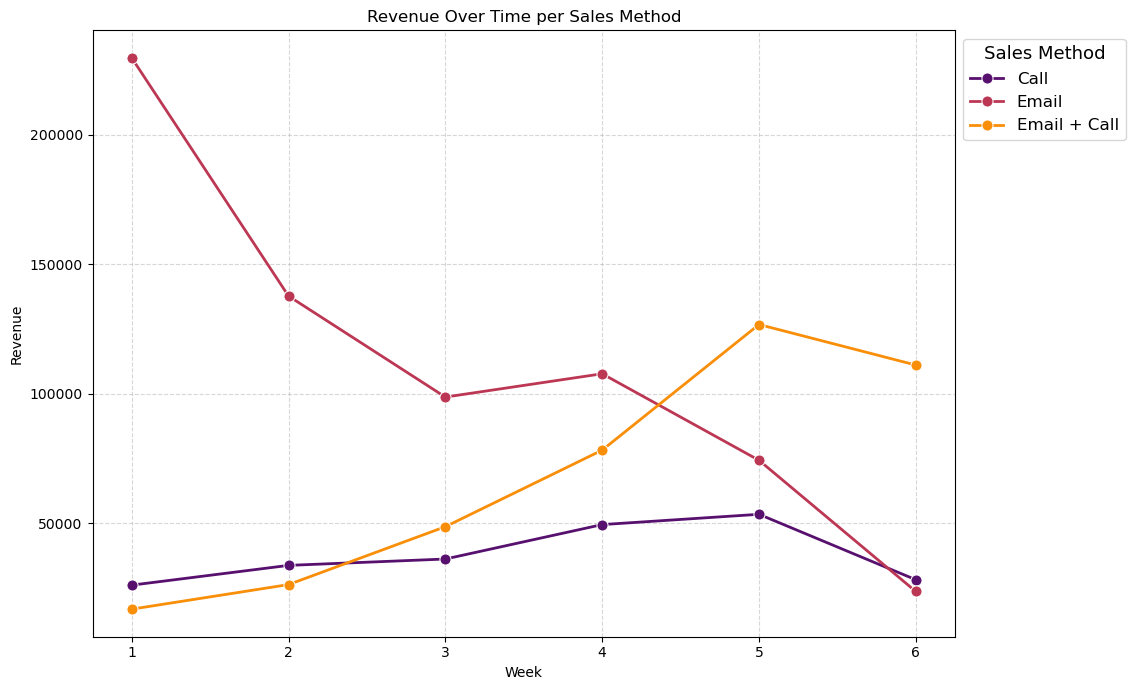

In [146]:
# Create the visualization
plt.figure(figsize=(12, 7))
sns.lineplot(
    x='week',
    y='revenue',
    data=grouped_df,  # Use the grouped dataframe
    hue='sales_method',
    linewidth=2, 
    marker='o',  
    markersize=8,  
    err_style="band",  
    palette="inferno",  
)

plt.title('Revenue Over Time per Sales Method') 
plt.xlabel('Week') 
plt.ylabel('Revenue') 

plt.grid(True, linestyle='--', alpha=0.5)  
plt.legend(
    title='Sales Method',
    fontsize=12,
    title_fontsize=13,
    loc='upper left',
    bbox_to_anchor=(1, 1),
)  
plt.tight_layout()
plt.subplots_adjust(right=0.8)  

plt.show()

# is there any difference in the average number of years as a customer of site visits, products sold and revenue per sales method? 

In [147]:
df.groupby('sales_method').agg({'nb_new_products_sold': 'mean', 'revenue': 'mean', 'nb_site_visits': 'mean', 'years_as_customer': 'mean'})

,nb_new_products_sold,revenue,nb_site_visits,years_as_customer
sales_method,,,,
Call,9.500837,47.596866,24.421757,5.152720
Email,9.723017,97.127671,24.734142,4.989886
Email + Call,12.186685,183.651233,26.738641,4.526316


#### Revenue per state 

In [148]:
df.keys()

Index(['week', 'sales_method', 'customer_id', 'nb_new_products_sold',
       'revenue', 'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

In [149]:
# aggregating revenue, number of products sold and number of site visits per state
agg_by_state = df.groupby('state').agg(
    {   
        'customer_id': 'count',
        'revenue': 'sum',
        'nb_new_products_sold': 'sum',
        'nb_site_visits': 'sum',
    }
).sort_values('revenue', ascending=False)

In [161]:
agg_by_state.to_csv('aggregated_data_by_state.csv')

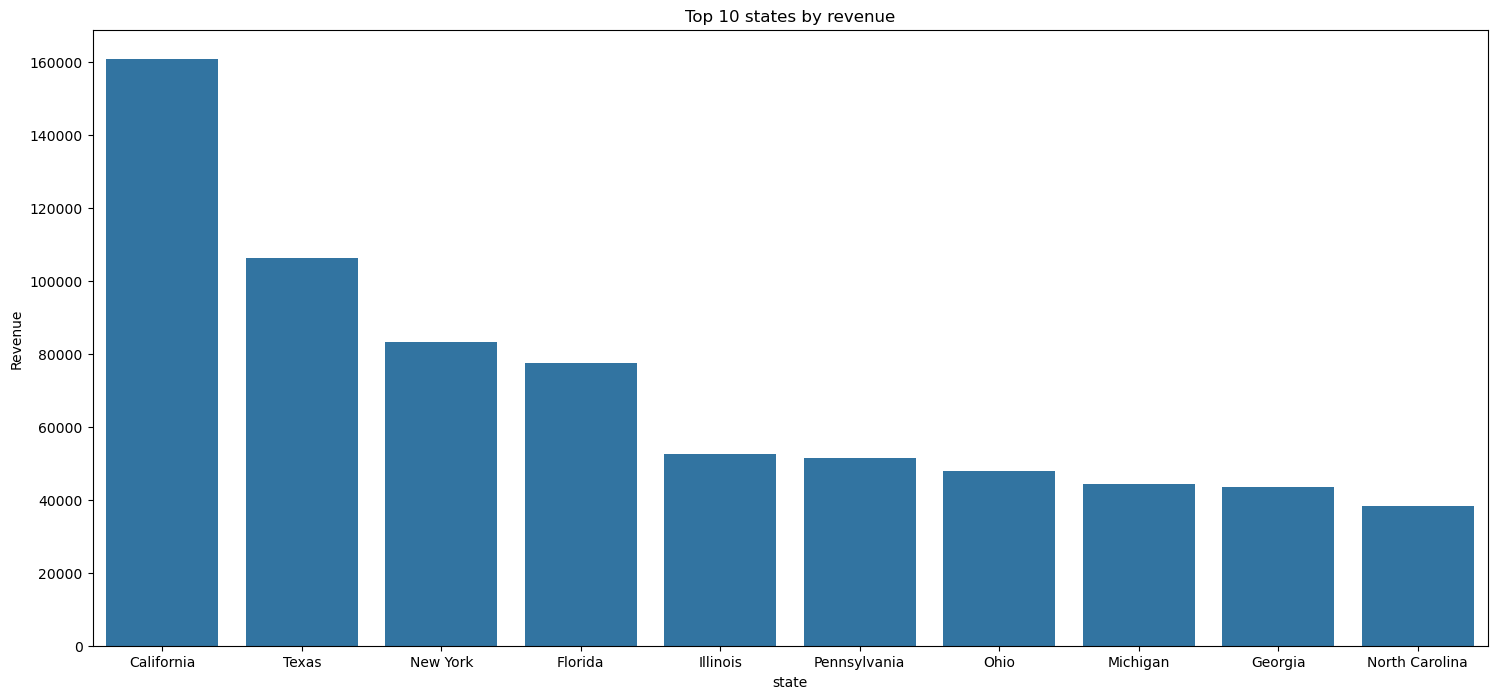

In [150]:
# visualization top 10 states by revenue
top_10_states = agg_by_state.head(10)
plt.figure(figsize=(18, 8))
sns.barplot(x=top_10_states.index, y='revenue', data=top_10_states)
plt.title('Top 10 states by revenue') 
plt.ylabel('Revenue')
plt.show()

In [151]:
# grouping by state and summing revenue
revenue_by_state = df.groupby('state')['revenue'].sum().reset_index()
revenue_by_state = agg_by_state.sort_values('revenue', ascending=False)

#### Number of new products sold by state 

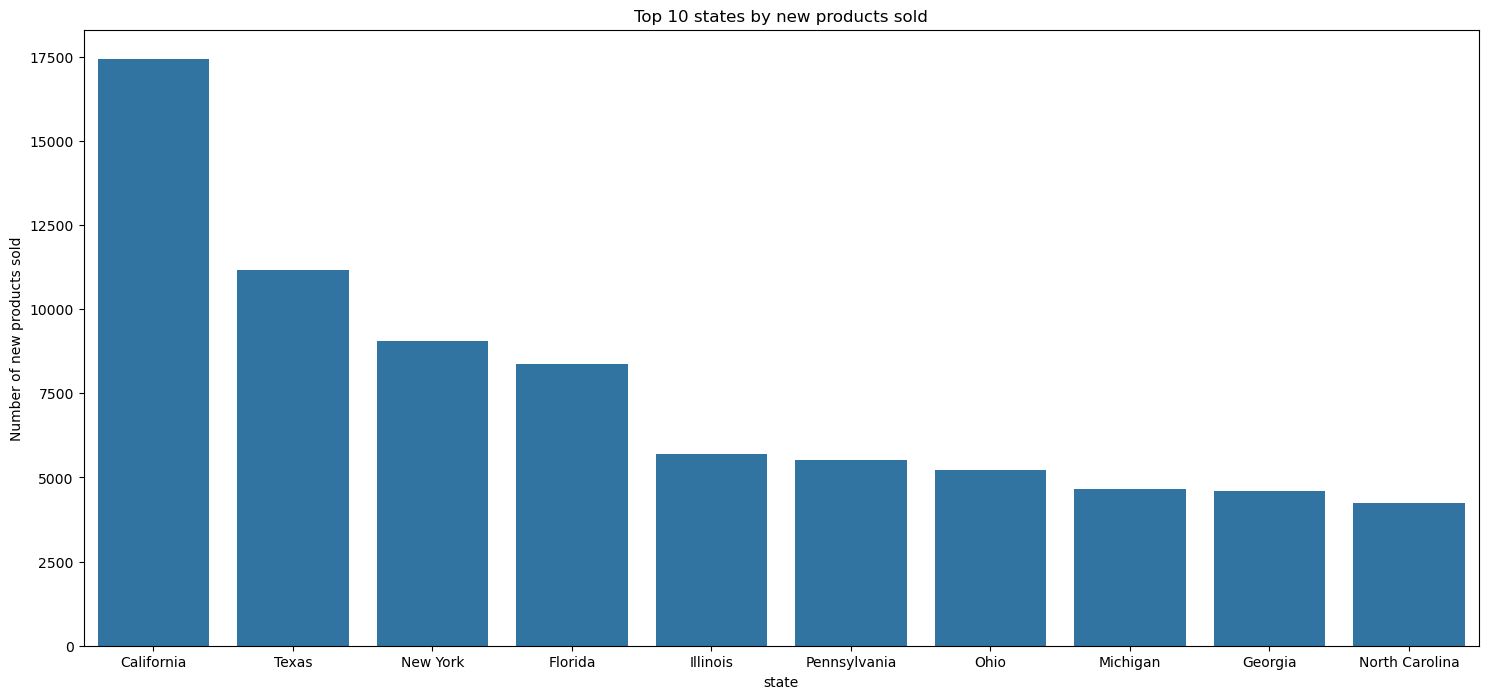

In [152]:
# visualization top 10 states by number of new products sold
top_10_states = agg_by_state.head(10)
plt.figure(figsize=(18, 8))
sns.barplot(x=top_10_states.index, y='nb_new_products_sold', data=top_10_states)
plt.title('Top 10 states by new products sold') 
plt.ylabel('Number of new products sold')
plt.show()

#### Number of site visits per state

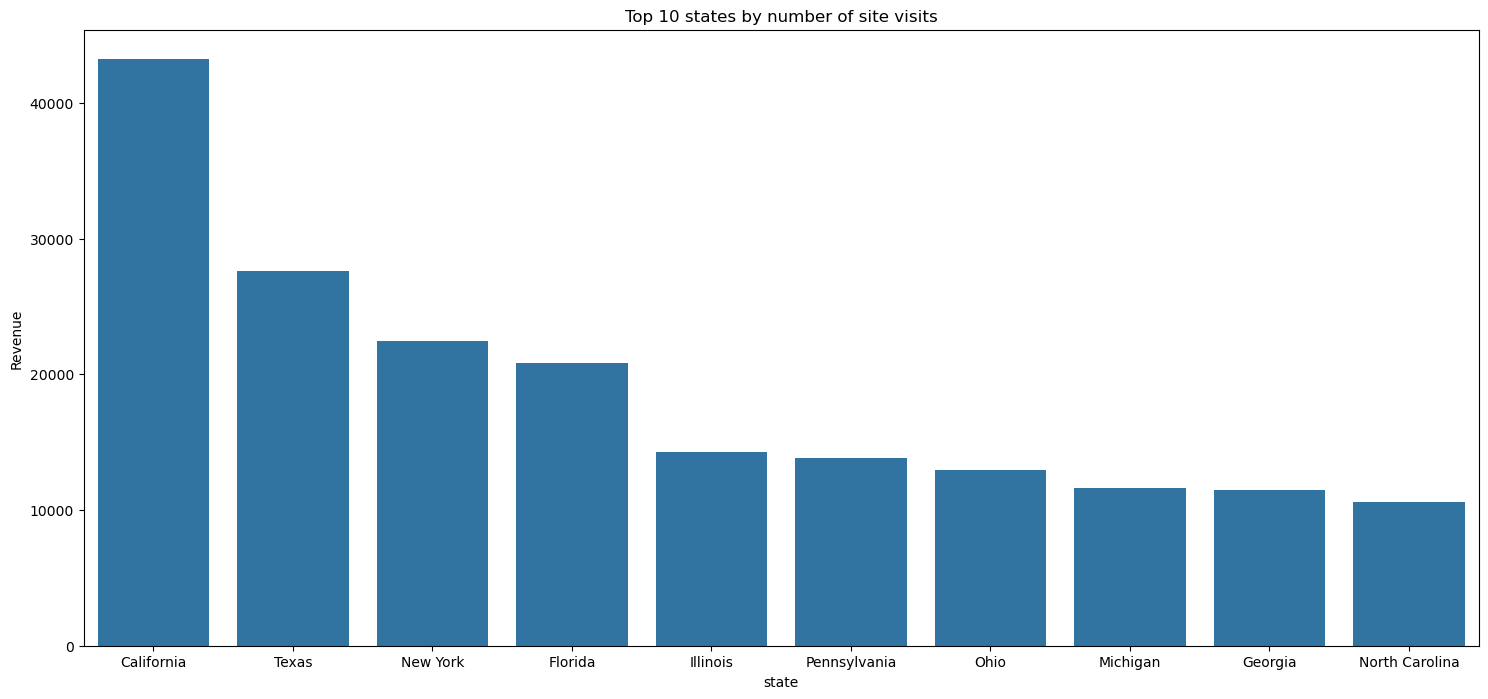

In [153]:
# visualization top 10 states by number of sie visits
top_10_states = agg_by_state.head(10)
plt.figure(figsize=(18, 8))
sns.barplot(x=top_10_states.index, y='nb_site_visits', data=top_10_states)
plt.title('Top 10 states by number of site visits') 
plt.ylabel('Revenue')
plt.show()

#### Number of customers per state

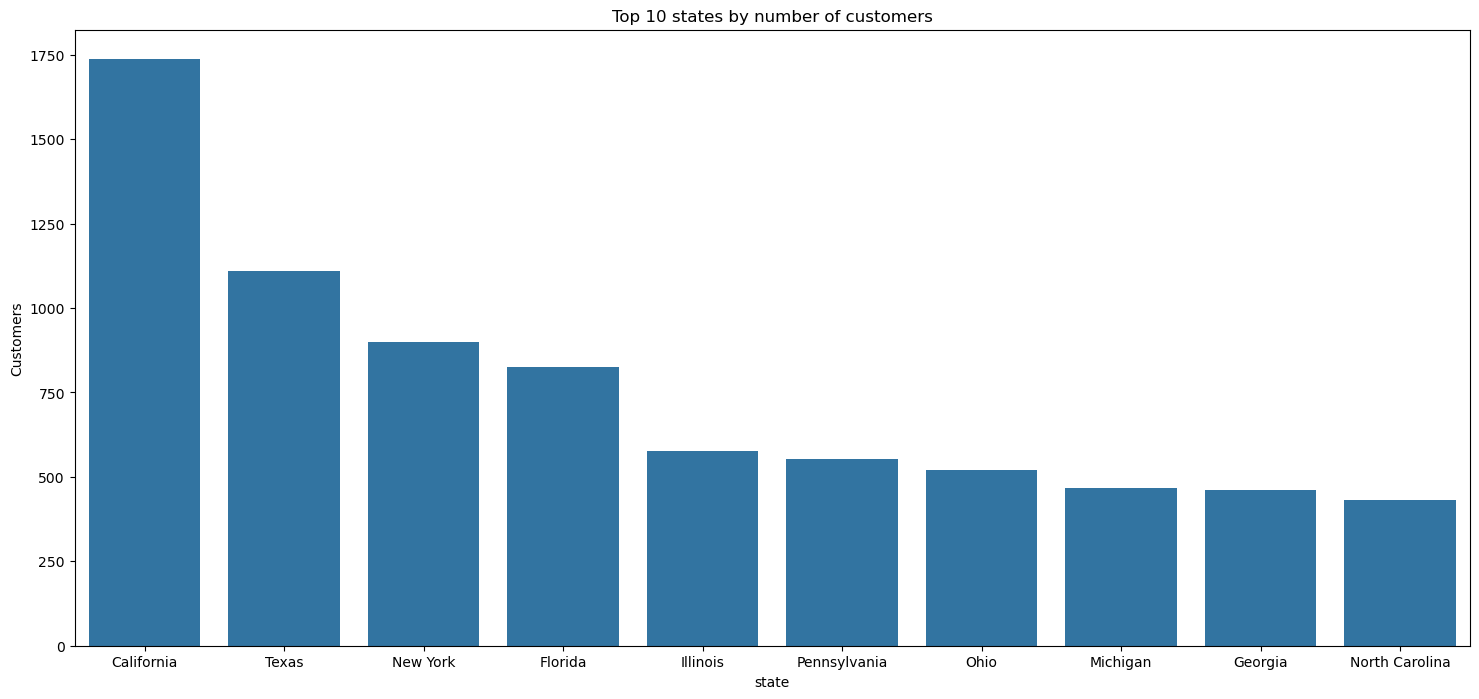

In [154]:
# visualization top 10 states by number of customers
top_10_states = agg_by_state.head(10)
plt.figure(figsize=(18, 8))
sns.barplot(x=top_10_states.index, y='customer_id', data=top_10_states)
plt.title('Top 10 states by number of customers') 
plt.ylabel('Customers')
plt.show()

#### Number of new products sold 

In [155]:
df.keys()

Index(['week', 'sales_method', 'customer_id', 'nb_new_products_sold',
       'revenue', 'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

In [156]:
# checking the mean and standard deviation of new products sold
df['nb_new_products_sold'].describe()

count    13924.000000
mean        10.040075
std          1.789819
min          7.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         16.000000
Name: nb_new_products_sold, dtype: float64

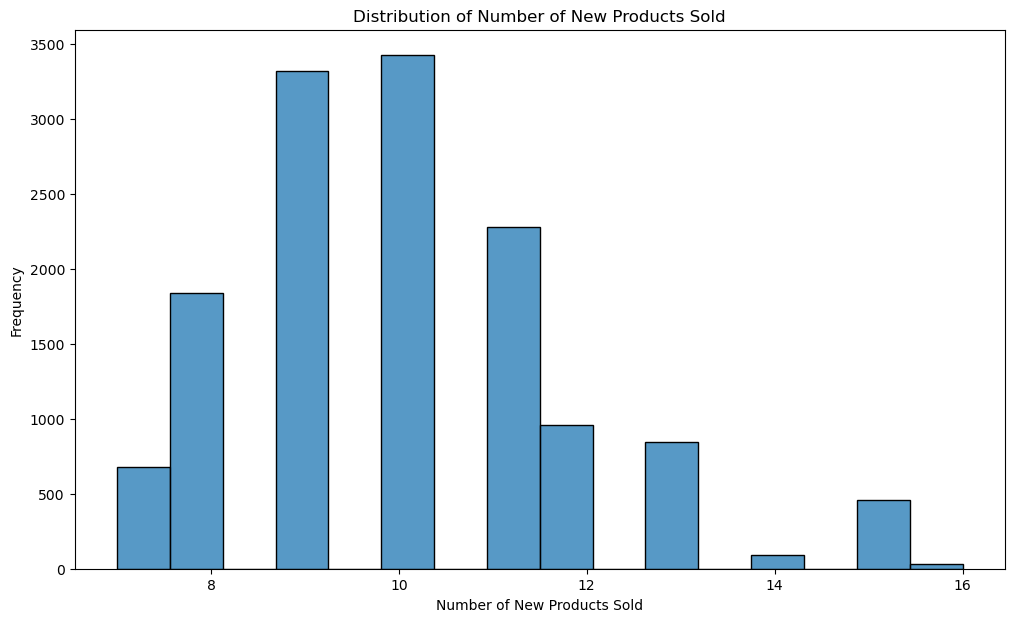

In [157]:
# visualizing the distribution of number of new products sold
plt.figure(figsize=(12, 7)) 
sns.histplot(df['nb_new_products_sold'], bins=16)
plt.title('Distribution of Number of New Products Sold') 
plt.xlabel('Number of New Products Sold') 
plt.ylabel('Frequency')  
plt.show()

Findings: 
- Based on the coefficient of variation and the range of the data, a standard deviation of 1.79 seems to indicate moderate variability
- Average number of new products sold is 10.040075

### Is there a correlation between the number of new products sold, the number of site visits, year as customer and the revenue?

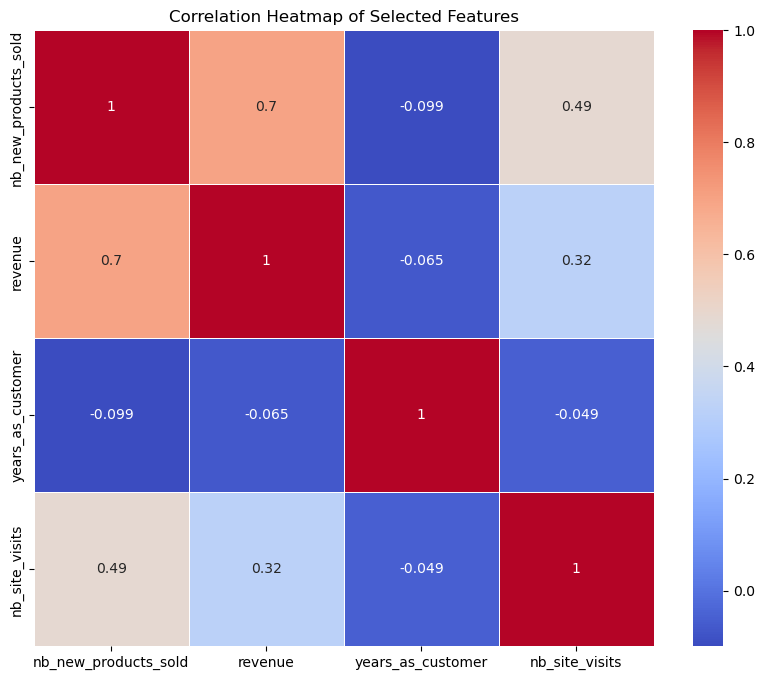

In [158]:
# select numerical columns for the heatmap
columns_for_heatmap = ['nb_new_products_sold', 'revenue', 'years_as_customer', 'nb_site_visits']
df_subset = df[columns_for_heatmap]

# calculate the correlation matrix
correlation_matrix = df_subset.corr()

# visualizing the result 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

Finding:
- Very weak negative correlation between revenue and year as customer
- Weak positive correlation between revenue and number of site visits
- Moderate positive correlation between number of site visits and number of products sold
- Strong positive correlation between revenue and number of new products sold 

# Written Report

## Sales Strategy Report
---
### Overall Sales And Revenue

**Total number of customers:**
-  13 924

**Total revenue:** 
- $1 307 990

**Customer with the lowest revenue:** 
- $32 

**Customer with the highest revenue:** 
- $238 
---
### Breakdown Of Sales And Revenue Per Sale Method

**Calls-only:** 
- Number of customers: 4 780
- Total revenue: $227 513
- Average revenue per customer: $47

**Emails-only:** 
- Number of customers: 6 921
- Total revenue: $672 220
- Average revenue per customer: $97

**Calls + Email:**
- Number of customers: 2 223
- Total revenue: $408 256
- Average revenue per customer: $183
---
### Geographical Patterns 

The top 10 states by number of customers, number of new product sales, number of site visits, and total revenue in descending oder:
- California
- Texas
- New York
- Florida
- Illinois
- Pennsylvania
- Ohio
- Michigan
- Georgia
- North Carolina. 
---
### Correlation 
- As Customer longevity increases (years as a customer), there is a low chance of decrease in revenue (week relationship). 

- As the number of site visits increase, there is a moderate chance of increase in number of products sols (moderate relationship). 

- As number of products increase, there is a high chance of increased revenue (strong relationship). 
---
### Summary

My analysis reveals consistent revenue growth across all three sales approaches, with each method following similar upward trajectories over time. The combined Email + Call approach has proven to be the most effective strategy, generating the highest average revenue per customer. While the Email-only method produced the highest total revenue, this was primarily due to the larger customer base it was applied to rather than performance per customer. The Calls-only approach consistently underperformed in comparison to the other approaches, resulting in both the lowest total and average revenue figures.

Based on the analysis, I recommend implementing a tiered approach to sales strategy. The Email + Call combination should be established as our primary sales method, given its performance in revenue per customer. When resources are constrained, the Email-only approach should serve as our secondary strategy, while the Calls-only method should be phased out due to its relatively poor performance.

The analysis highlights strong performance in ten key states, which consistently outperforming others across customer base, new product sales, site visits, and revenue generation: California, Texas, New York, Florida, Illinois, Pennsylvania, Ohio, Michigan, Georgia, and North Carolina. These markets should be prioritized for sales activities for our current product lineup.

Additionally, the data shows a correlations between site visits, product sales volume, and revenue generation. To validate our findings regarding the relationship between site visits and sales performance, I recommend conducting an A/B test. This would involve comparing our standard email format against a version optimized specifically to drive site visits, measuring the impact on visit frequency, product sales, and revenue generation.

Moving forward, I recommend tracking overall sales performance on a monthly, quarterly, and yearly basis in order to understand the overall trends and potential areas of improvement by measuring these key performance indicators (KPIs):
- Conversion rate (number of sales divided by the number of calls/emails)
- Number of site visit
- Number of products sales
- Total revenue

Furthermore, I recommend evaluating sales methods (both overall and for specific market segments such as individual states or new product releases) by measuring the following Key Performance Indicators (KPIs):
- Average conversion rate (number of sales divided by the number of calls/emails)
- Average number of site visits 
- Average number of products sold 
- Average revenue   

The above KPIs will serve as a foundation for data-driven decision making, leading to improved business outcomes through more strategic resource allocation and better-informed decisions. They will increase visibility within the sales organization, allowing us to spot both positive and negative trends. Furthermore, the above KPIs will make our sales methods measurable, enabling us to identify top-performing sales methods both overall and for specific market segments. This will allow us to proactively adjust our sales strategies to maximize revenue.  